In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('train_x.csv')

In [5]:
df.head()

ID      Expense       Income Loan type Occupation type  Age    Score1  \
0   1  1830.943788  14767.28013         B               Y  1.0  0.016885   
1   2  1645.302546  15272.26775         B               Y  0.0  0.240375   
2   3  1555.026392  17482.49734         A               Y  0.0  0.213921   
3   4          NaN  16257.66493         A               Y  0.0  0.303909   
4   5  1777.648916  16316.29914         B               X  1.0       NaN   

       Score2     Score3      Score4       Score5  
0  205.196182  22.521523  600.911200  3464.613291  
1  194.266317   5.349117  600.888816  3374.921455  
2  183.529871  -1.054954  598.596944  3331.304886  
3  191.228965   6.971750  602.447203  3392.275849  
4  224.074728  11.218489  605.947340  3438.864083

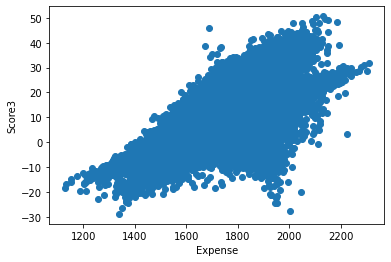

In [6]:
plt.scatter(df['Expense'],df['Score3'])
plt.xlabel('Expense')
plt.ylabel('Score3')
plt.show()

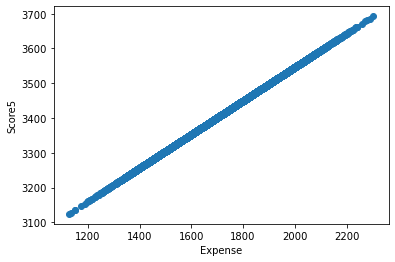

In [20]:
plt.scatter(df['Expense'],df['Score5'])
plt.xlabel('Expense')
plt.ylabel('Score5')
plt.show()

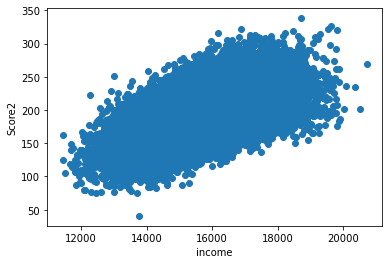

In [8]:
plt.scatter(df['Income'],df['Score2'])
plt.xlabel('income')
plt.ylabel('Score2')
plt.show()

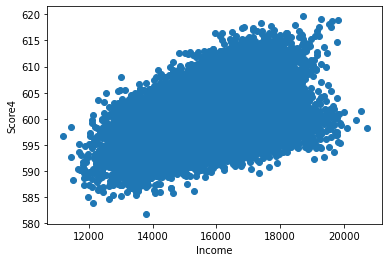

In [9]:
plt.scatter(df['Income'],df['Score4'])
plt.xlabel('Income')
plt.ylabel('Score4')
plt.show()

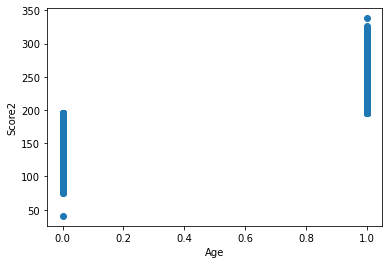

In [10]:
plt.scatter(df['Age'],df['Score2'])
plt.xlabel('Age')
plt.ylabel('Score2')
plt.show()

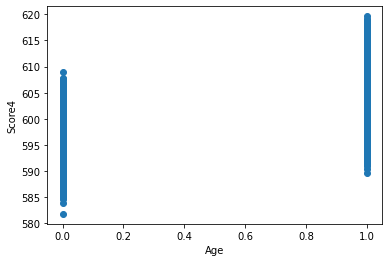

In [11]:
plt.scatter(df['Age'],df['Score4'])
plt.xlabel('Age')
plt.ylabel('Score4')

plt.show()

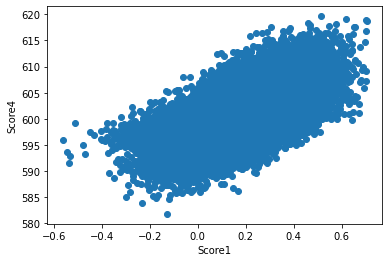

In [12]:
plt.scatter(df['Score1'],df['Score4'])
plt.xlabel('Score1')
plt.ylabel('Score4')
plt.show()

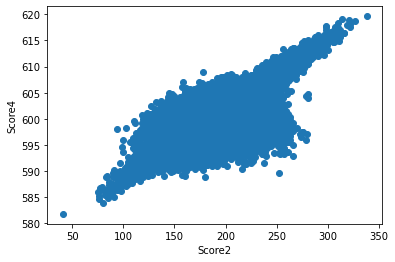

In [13]:
plt.scatter(df['Score2'],df['Score4'])
plt.xlabel('Score2')
plt.ylabel('Score4')
plt.show()

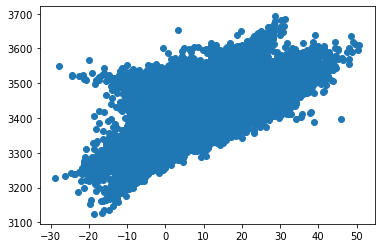

In [14]:
plt.scatter(df['Score3'],df['Score5'])
plt.show()

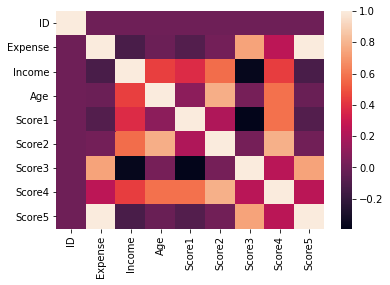

In [21]:
import seaborn as sns
sns.heatmap(df.corr())

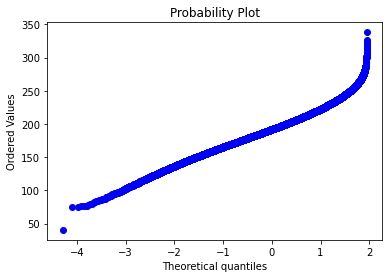

In [25]:
import numpy as np 
import pylab 
import scipy.stats as stats

stats.probplot(df['Score2'], dist="norm", plot=pylab)
pylab.show()

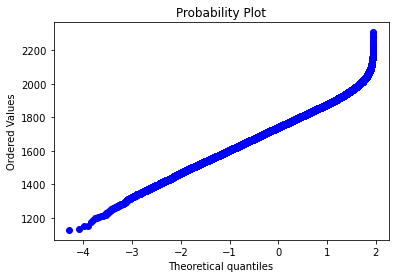

In [36]:
import pylab 
import scipy.stats as stats
stats.probplot(df['Expense'], dist="norm", plot=pylab,fit=False)
pylab.show()

In [37]:
def nunique_table(df, which=None, ascending=False):
    cols = df.columns
    unique_vals = np.array([df[col].nunique() for col in cols])
    percentage = (unique_vals.astype('float')/len(df))*100
    
    unique_table = pd.DataFrame(np.vstack((cols, unique_vals, percentage)).T,
                                columns=['column', 'unique values', '% of total'])
    unique_table = unique_table.sort_values(by='unique values', ascending=ascending)
    
    if which is None:
        return unique_table
    else:
        part_cols = np.array(which)
        unique_vals = df[which].nunique().values
        percentage = (unique_vals/len(df))*100
        
        unique_table = pd.DataFrame(np.vstack((part_cols, unique_vals, percentage)).T,
                             columns=['column', 'unique values', '% of total'])
        unique_table['unique values'] = unique_table['unique values'].astype('int')
        unique_table['% of total'] = unique_table['% of total'].astype('float')
        unique_table = unique_table.sort_values(by='unique values', ascending=ascending)
        return unique_table

In [41]:
nunique_table(df, which=['Expense','Income','Age','Score1','Score2',"Score3",'Score4','Score5'], ascending=False)

column  unique values  % of total
3   Score1          78054    97.56750
5   Score3          78045    97.55625
1   Income          78038    97.54750
6   Score4          78004    97.50500
7   Score5          77987    97.48375
4   Score2          77962    97.45250
0  Expense          77953    97.44125
2      Age              2     0.00250

In [46]:
from scipy.stats import probplot
def dist_dashboard(train, num_cols=None, transform=None):
    if num_cols is None:
        raise ValueError('Numeric columns not specified')
    else:
        if transform is not None:
            train[num_cols] = train[num_cols].apply(transform)
        for col in num_cols:
            plt.figure(figsize=(13,5))

            # Plot histogram of values
            plt.subplot(121)
            plt.hist(train[col], bins=20, edgecolor='black')
            plt.grid()
            plt.title(col)
            plt.ylabel('frequency')

            # Plot probplot for normal distribution
            plt.subplot(122)
            probplot(train.loc[train[col].notnull(), col].values, dist='norm', plot=plt)
            plt.grid()
            plt.title(col)

            plt.tight_layout()
            plt.show()
            

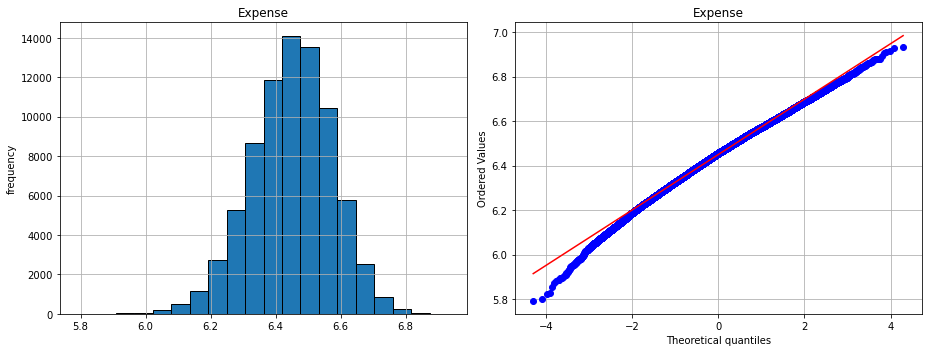

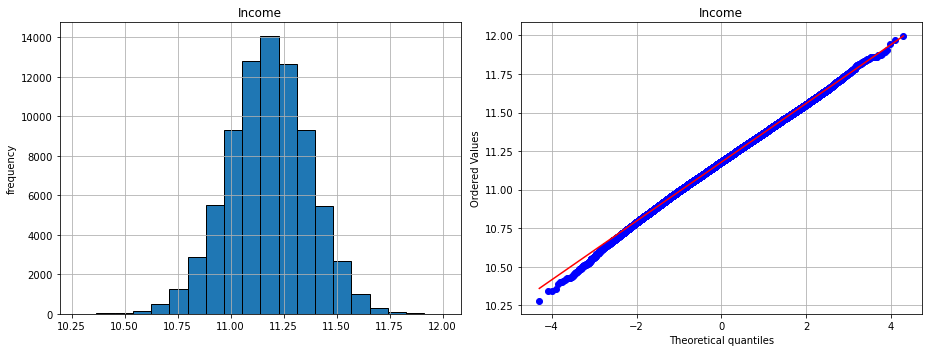

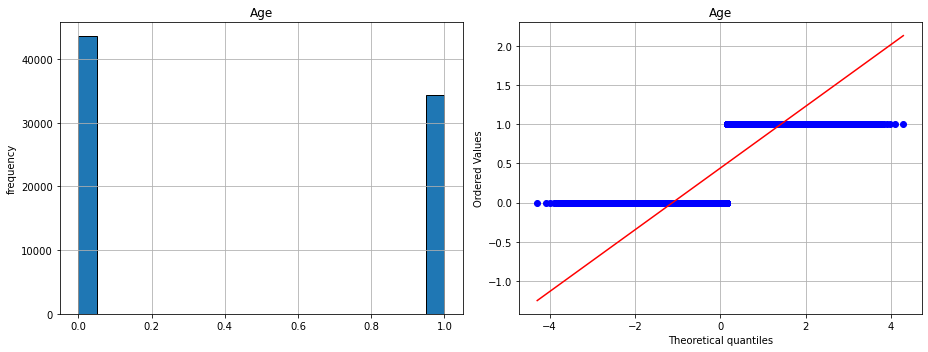

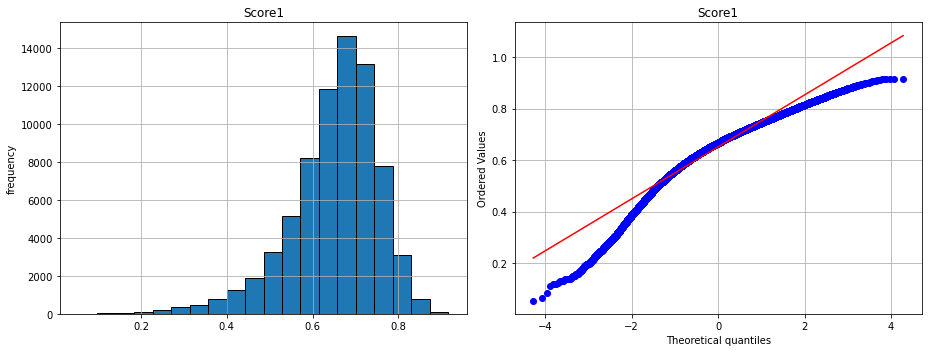

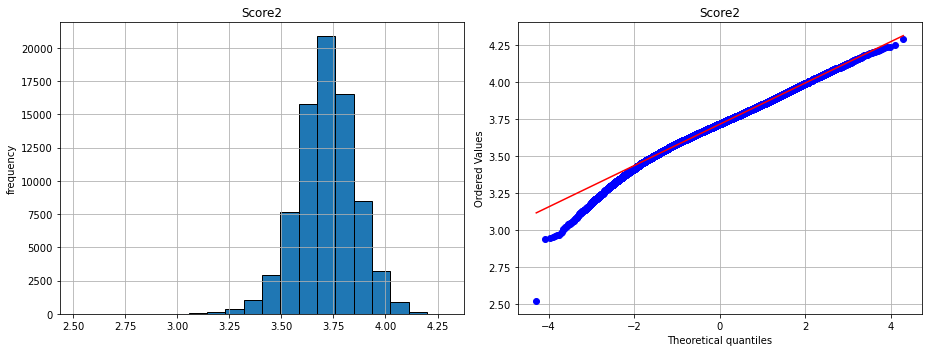

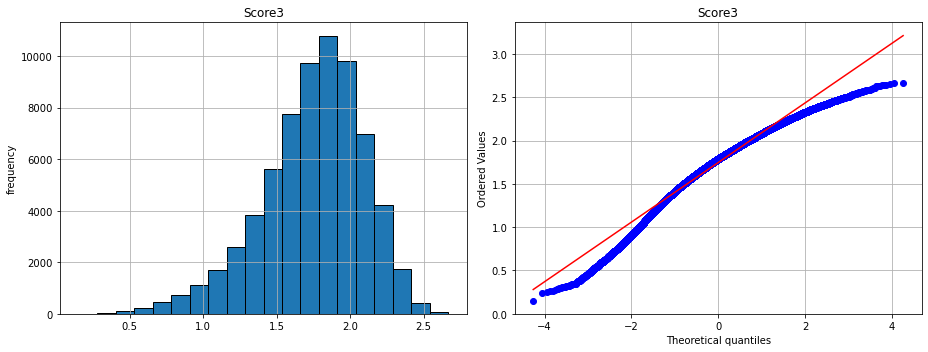

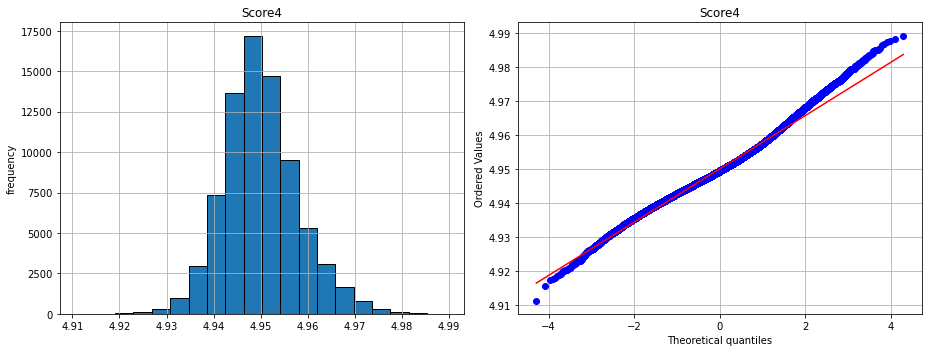

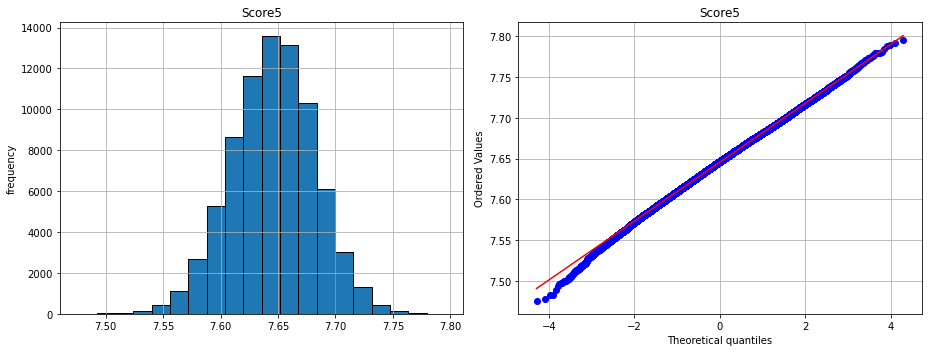

In [47]:
dist_dashboard(df, num_cols=['Expense','Income','Age','Score1','Score2',"Score3",'Score4','Score5'], transform=lambda x: np.sqrt(x))

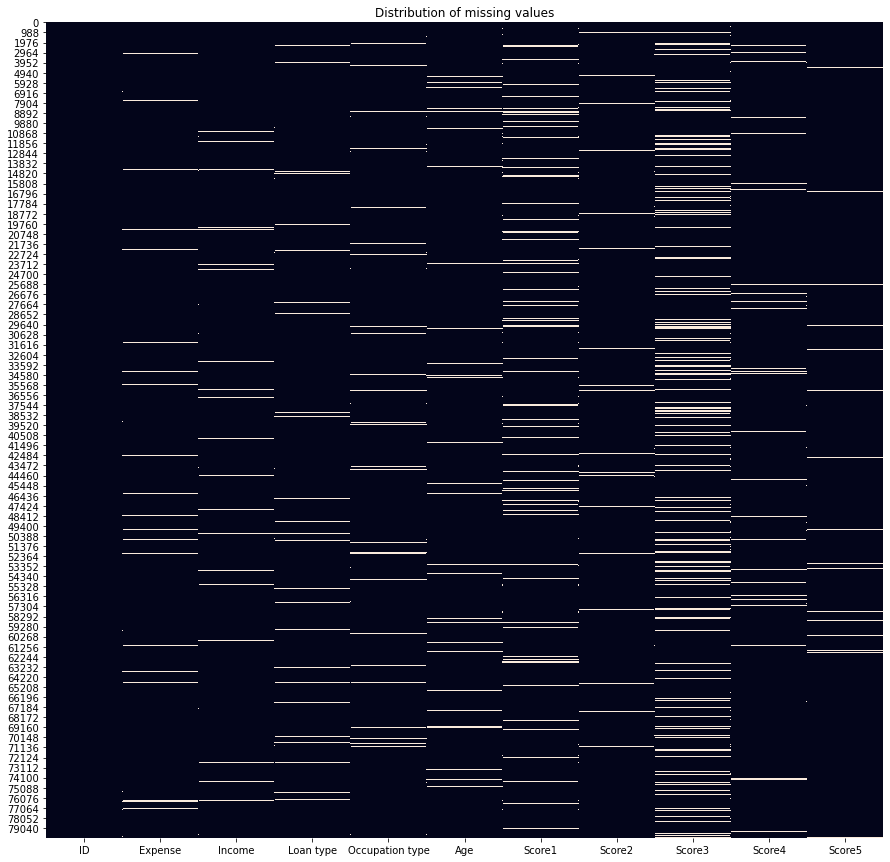

In [49]:
plt.figure(figsize=(15,15))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Distribution of missing values')
plt.show()

In [50]:
def pair_plotter(df, target=None, cols=None):
    if cols is not None:
        df = df[cols+[target]]
    
    sns.pairplot(df, hue=target, diag_kind='kde', plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
                 size = 4)
    plt.title('Pairplots')
    plt.show()

In [55]:
y=pd.read_csv('train_y.csv')
df['Label']=y['Label']

D:\Program\miniconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


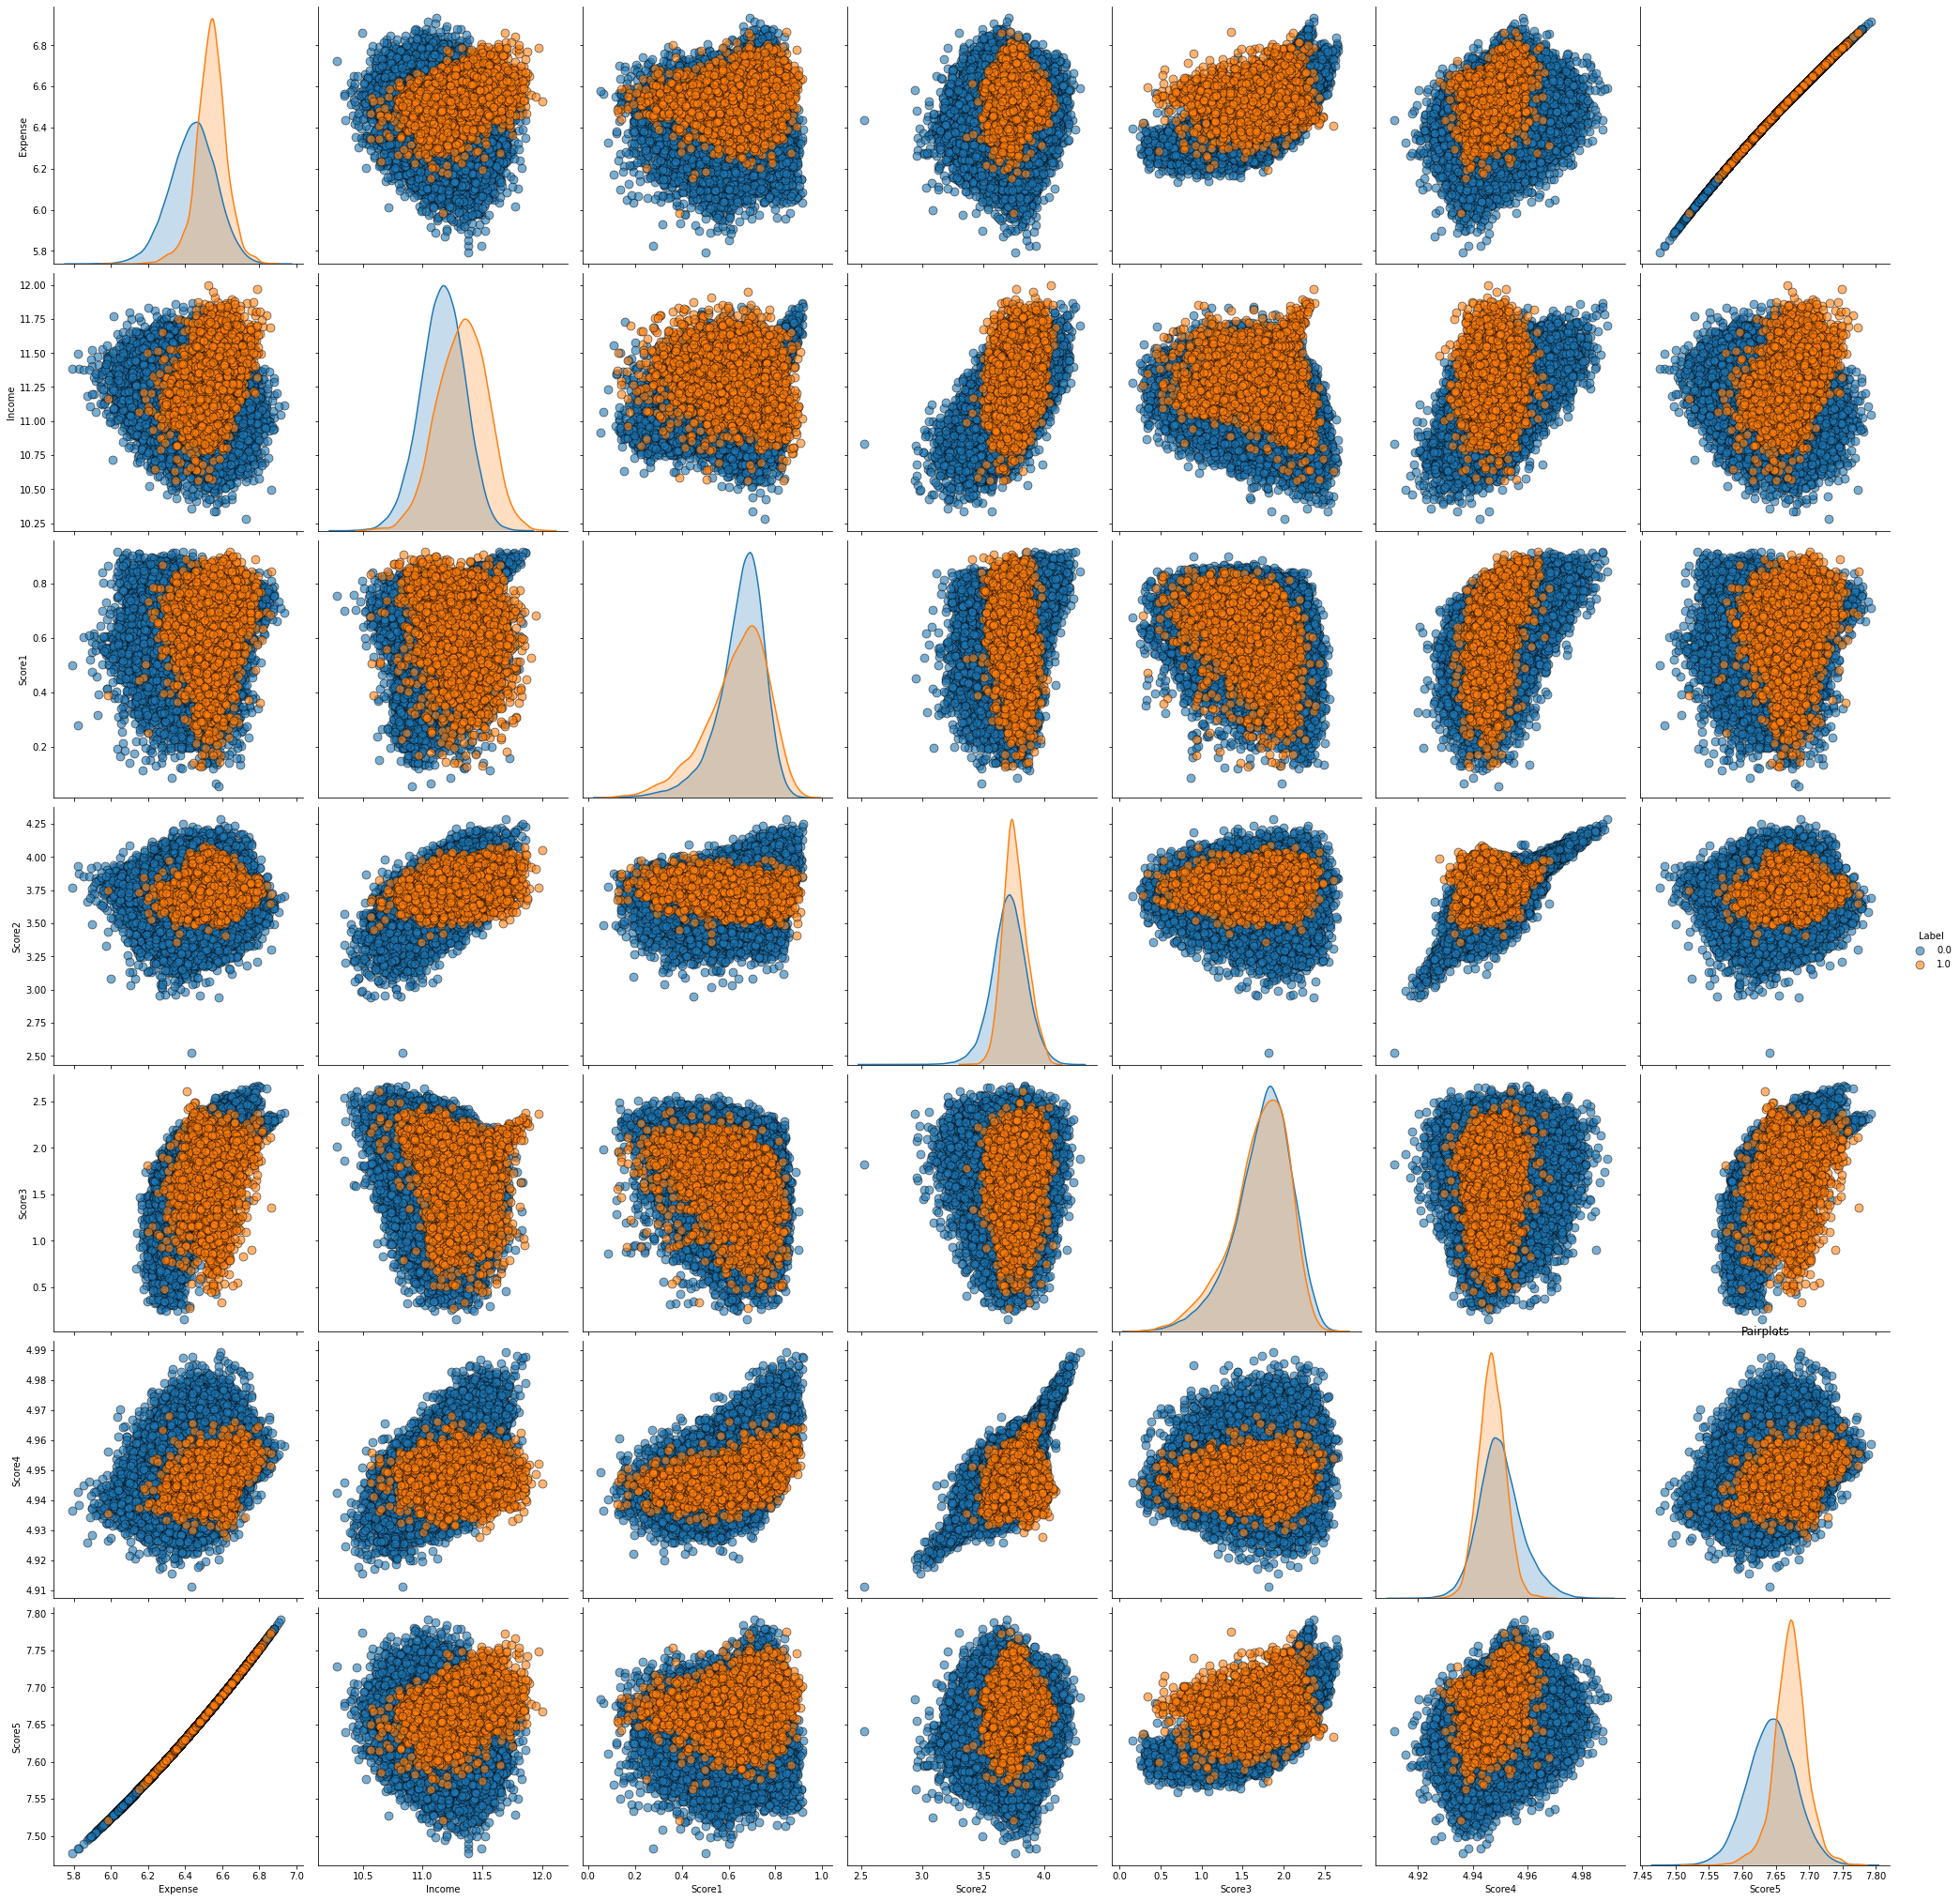

In [57]:
pair_plotter(df, target='Label', cols=['Expense','Income','Score1','Score2',"Score3",'Score4','Score5'])